# Explore _weather_ Data

In this short report we perform correlation analysis on the _weather_ data and will discard certain variables which are highly correlated with other variables.

In [1]:
# load necessary packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib import cm
import seaborn as sns

In [2]:
# show the figures within the notebook
%matplotlib inline

# Select ggplot as style
plt.style.use("ggplot")

## Display the data

In [3]:
# read the data
df_weather = pd.read_csv("../data/weather_fixed.csv", parse_dates=["date"])

# display the data
display(df_weather.head())

# show the number of data points in trip.csv
print("This table has {npnts} data points and {col} columns.".format(npnts=df_weather.shape[0], col=df_weather.shape[1]))

# display the features
print("\nThe columns in this dataset are:")
print("".join([str(i+1) + ". " + df_weather.columns[i]+"\n" for i in range(len(df_weather.columns))]))

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0.0,4.0,NaN,286.0,94107
1,2013-08-30,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0.0,2.0,NaN,291.0,94107
2,2013-08-31,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0.0,4.0,NaN,284.0,94107
3,2013-09-01,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0.0,4.0,NaN,284.0,94107
4,2013-09-02,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0.0,6.0,NaN,277.0,94107


This table has 3665 data points and 24 columns.

The columns in this dataset are:
1. date
2. max_temperature_f
3. mean_temperature_f
4. min_temperature_f
5. max_dew_point_f
6. mean_dew_point_f
7. min_dew_point_f
8. max_humidity
9. mean_humidity
10. min_humidity
11. max_sea_level_pressure_inches
12. mean_sea_level_pressure_inches
13. min_sea_level_pressure_inches
14. max_visibility_miles
15. mean_visibility_miles
16. min_visibility_miles
17. max_wind_Speed_mph
18. mean_wind_speed_mph
19. max_gust_speed_mph
20. precipitation_inches
21. cloud_cover
22. events
23. wind_dir_degrees
24. zip_code



In [4]:
df_weather.dtypes

date                              datetime64[ns]
max_temperature_f                        float64
mean_temperature_f                       float64
min_temperature_f                        float64
max_dew_point_f                          float64
mean_dew_point_f                         float64
min_dew_point_f                          float64
max_humidity                             float64
mean_humidity                            float64
min_humidity                             float64
max_sea_level_pressure_inches            float64
mean_sea_level_pressure_inches           float64
min_sea_level_pressure_inches            float64
max_visibility_miles                     float64
mean_visibility_miles                    float64
min_visibility_miles                     float64
max_wind_Speed_mph                       float64
mean_wind_speed_mph                      float64
max_gust_speed_mph                       float64
precipitation_inches                     float64
cloud_cover         

## Correlation Analysis

In [5]:
# exclude zip_code and events from correlation analysis
columns_new = [x for x in df_weather.columns if x not in ["date", "zip_code", "events"]]
dfn = df_weather.loc[:, columns_new]

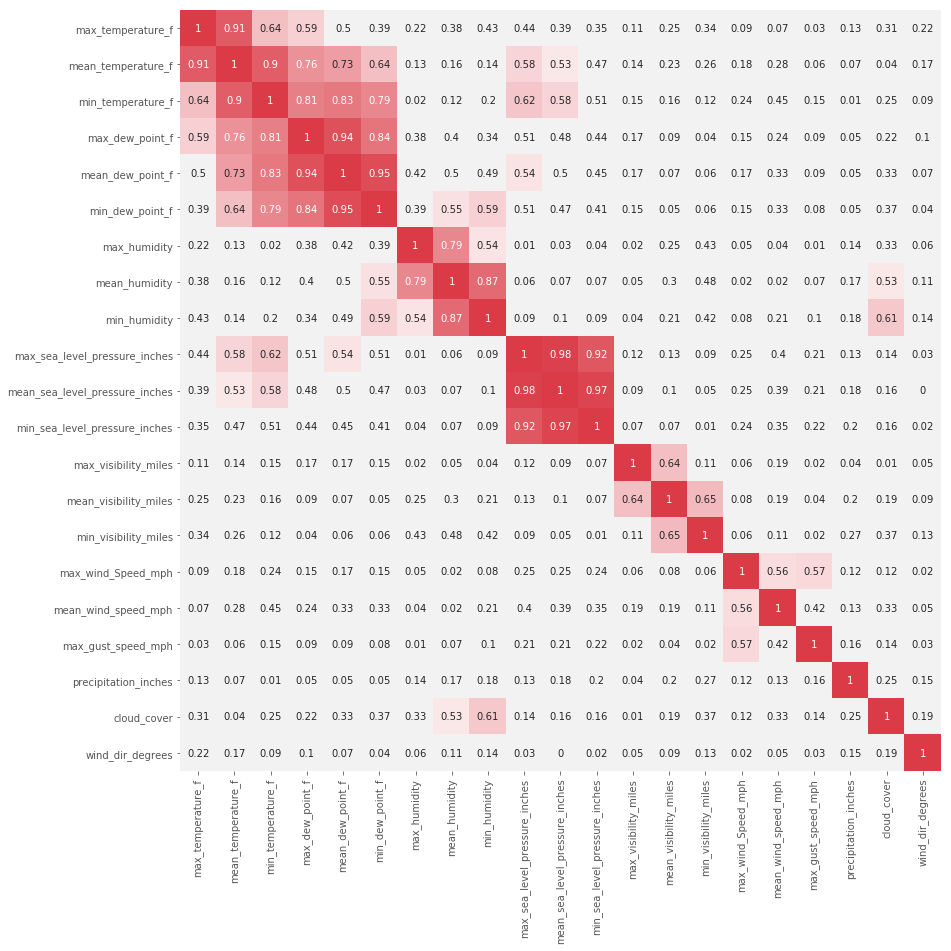

In [6]:
# plot heatmap of pariwise correlation 
fig, ax = plt.subplots(figsize=(14, 14))
corr = dfn.corr().abs().applymap(lambda x: round(x,2))
sns.heatmap(corr, cmap=sns.diverging_palette(200, 10, as_cmap=True),
            square=True, ax=ax, center=0.5, annot=True, cbar=False, vmin=0.5, vmax=1)

In [7]:
# Display pairs of features that have correlation of above 0.6
cor_mat = dfn.corr().abs()
unstck = cor_mat.unstack()
bl = unstck.apply(lambda x : (x >= 0.6) & (x<1.0))
display(unstck[bl].sort_values(ascending=False))

mean_sea_level_pressure_inches  max_sea_level_pressure_inches     0.979602
max_sea_level_pressure_inches   mean_sea_level_pressure_inches    0.979602
min_sea_level_pressure_inches   mean_sea_level_pressure_inches    0.970160
mean_sea_level_pressure_inches  min_sea_level_pressure_inches     0.970160
mean_dew_point_f                min_dew_point_f                   0.951657
min_dew_point_f                 mean_dew_point_f                  0.951657
max_dew_point_f                 mean_dew_point_f                  0.941917
mean_dew_point_f                max_dew_point_f                   0.941917
min_sea_level_pressure_inches   max_sea_level_pressure_inches     0.924429
max_sea_level_pressure_inches   min_sea_level_pressure_inches     0.924429
mean_temperature_f              max_temperature_f                 0.911053
max_temperature_f               mean_temperature_f                0.911053
min_temperature_f               mean_temperature_f                0.895589
mean_temperature_f       

**Conclusion**: From the above results we can see that some variables are highly correlated with each other. For example, mean_temperature_f is correlated with max_temperature_f and min_tempareature with a correlation coefficient of above 0.9. Therefore, we choose the following variables only based on a correlation coefficient threshold of 0.6: (1) mean_temperature_f (2) mean_humidity (3) mean_sea_level_pressure_inches (4) mean_visibility_miles (5) max_wind_Speed_mph (6) mean_wind_speed_mph (7) max_gust_speed_mph (8) precipitation_inches (9) cloud_cover (10) wind_dir_degrees. We also keep the non-numeric features such as date and events.